___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [14]:
# I don't know why but the DataReader is not choosing the correct timeframe no matter what start/end datetimes I initialize here
start_datetime = datetime.datetime(2006,1,1)
end_datetime = datetime.datetime(2016,1,1)

In [3]:
start_datetime

datetime.datetime(2006, 1, 1, 0, 0)

In [8]:
# os.environ["IEX_API_KEY"] = "pk_e61cf6e67ffa413a98463182ee7aac35"
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start_datetime, end_datetime)
# CitiGroup
C = data.DataReader("C", 'stooq', start_datetime, end_datetime)
# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start_datetime, end_datetime)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start_datetime, end_datetime)
# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start_datetime, end_datetime)
# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start_datetime, end_datetime)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [10]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [11]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys = tickers)

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Bank Ticker    BAC                                         C                   \
Stock Info    Open    High      Low  Close     Volume   Open    High      Low   
Date                                                                            
2020-07-02   23.84  23.990  23.2200  23.29   56000150  52.12  52.455  50.2843   
2020-07-01   24.03  24.070  23.2300  23.26   57379923  51.76  51.995  50.1500   
2020-06-30   23.20  23.910  23.0999  23.75   61716159  49.81  51.550  49.6500   
2020-06-29   23.41  23.835  23.1000  23.39   66269230  50.28  50.920  49.6100   
2020-06-26   24.09  24.110  23.0200  23.15  118139178  52.34  52.340  49.4700   

Bank Ticker                   ...     MS                                  \
Stock Info   Close    Volume  ...   Open   High     Low  Close    Volume   
Date                          ...                                          
2020-07-02   50.55  22042738  ...  48.86  49.03  47.680  47.79   7488814   
2020-07-01   50.35  19206929  ...  48.41  49.08  47.245  47.61  11363839   
2020-06-30   51.10  23360427  ...  47.06  48.53  47.060  48.30  11894391   
2020-06-29   50.29  22578568  ...  47.57  47.80  46.645  47.24   9380766   
2020-06-26   49.58  35426213  ...  48.30  48.37  46.605  47.05  20082528   

Bank Ticker    WFC                                  
Stock Info    Open    High    Low  Close    Volume  
Date                                                
2020-07-02   25.75  26.170  25.10  25.34  37013338  
2020-07-01   25.73  25.955  24.93  25.09  37509316  
2020-06-30   25.21  25.869  25.17  25.60  46609953  
2020-06-29   25.59  25.900  25.26  25.70  43769204  
2020-06-26   26.10  26.400  25.25  25.34  81172273  

[5 rows x 30 columns]

In [44]:
# start date 
bank_stocks.index[-1]

Timestamp('2015-07-06 00:00:00')

In [45]:
# end date
bank_stocks.index[0]

Timestamp('2020-07-02 00:00:00')

# Exploratory Data Analysis (EDA)

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [13]:
bank_stocks.xs(key='Close',axis=1, level=1).max()

BAC     35.169
C       80.515
GS     261.710
JPM    138.750
MS      56.637
WFC     59.723
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [17]:
for ticker in tickers:
    returns[ticker]=bank_stocks.xs(key=(ticker,'Close'), axis=1).pct_change()

In [19]:
returns.head()

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,-0.001288,-0.003956,0.000861,0.006475,-0.003766,-0.009866
2020-06-30,0.021066,0.014896,0.000253,0.008578,0.014493,0.020327
2020-06-29,-0.015158,-0.015851,-0.021000,-0.011269,-0.021946,0.003906
2020-06-26,-0.010261,-0.014118,-0.022122,-0.004409,-0.004022,-0.014008


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

C:\Users\80203607\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\80203607\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


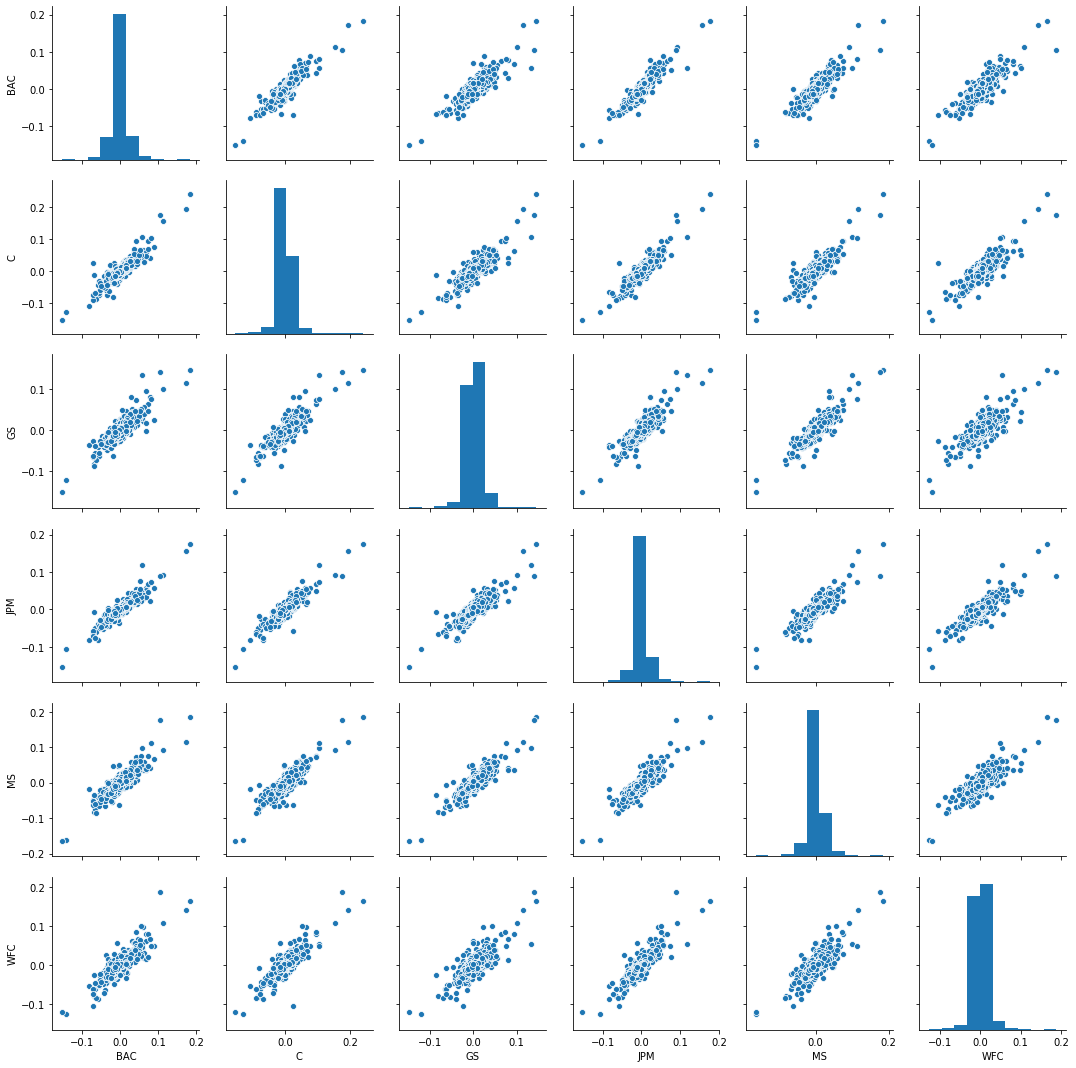

In [22]:
import seaborn as sns 
sns.pairplot(data=returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [27]:
# Date of worst single day returns.
returns.idxmin()

BAC   2020-03-12
C     2020-03-12
GS    2020-03-12
JPM   2020-03-12
MS    2020-03-12
WFC   2020-03-23
dtype: datetime64[ns]

In [28]:
# Date of worst single day returns.
returns.idxmax()

BAC   2020-03-13
C     2020-03-13
GS    2020-03-13
JPM   2020-03-13
MS    2020-03-13
WFC   2020-03-11
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [29]:
returns.std()

BAC    0.021654
C      0.023490
GS     0.019904
JPM    0.018793
MS     0.021877
WFC    0.020276
dtype: float64

In [46]:
# Looking at the standard deviation over YTD 2020 just to see effect of coronavirus
returns.loc['2020-07-03':'2020-01-01'].std()

BAC    0.047413
C      0.056604
GS     0.042936
JPM    0.043901
MS     0.046908
WFC    0.049184
dtype: float64

In [47]:
# as compared to the same time period in 2019
returns.loc['2019-07-03':'2019-01-01'].std()

BAC    0.014976
C      0.015507
GS     0.015354
JPM    0.011518
MS     0.015404
WFC    0.011463
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

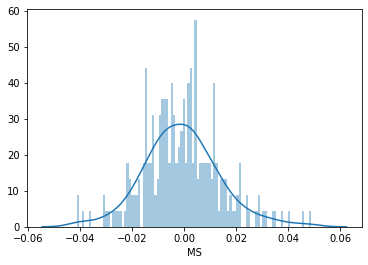

In [64]:
a = returns["MS"].loc['2019-12-30':'2019-01-01'].dropna()
a
plot = sns.distplot(a, bins=100)
# plot.set_xlim([-0.05, 0.05])

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

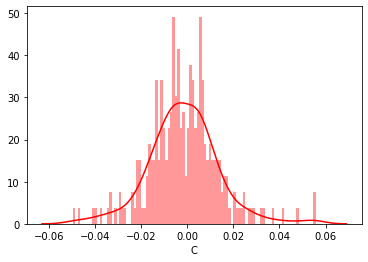

In [66]:
a = returns["C"].loc['2019-12-30':'2019-01-01'].dropna()
a
plot = sns.distplot(a, bins=100, color="red")
# plot.set_xlim([-0.05, 0.05])

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

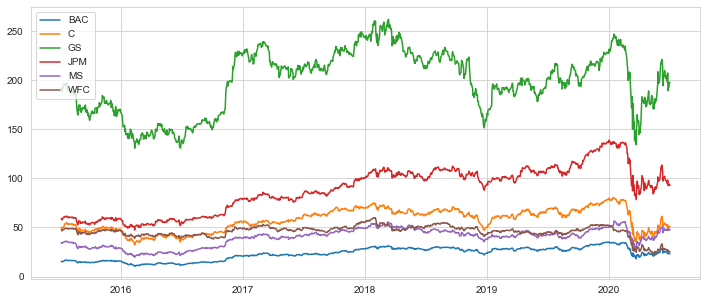

In [90]:
fig = plt.figure(figsize=(12,5))
for ticker in tickers:
    plt.plot(bank_stocks[ticker]["Close"])
    plt.legend(tickers)

In [96]:
# plotly
bank_stocks.xs(key='Close',axis=1,level=1).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

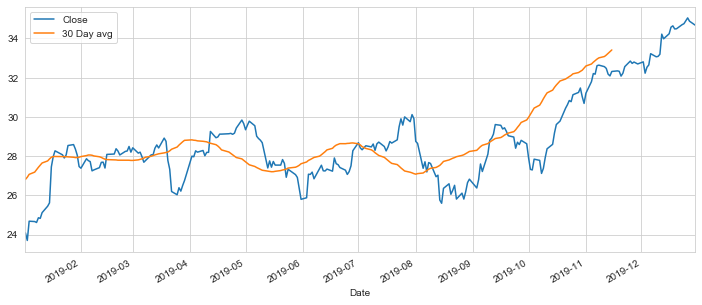

In [115]:
plt.figure(figsize=(12,5))
bank_stocks["BAC"]["Close"].loc['2019-12-30':'2019-01-01'].plot(label="Close")
bank_stocks["BAC"]["Close"].loc['2019-12-30':'2019-01-01'].rolling(window=30).mean().plot(label="30 Day avg")
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

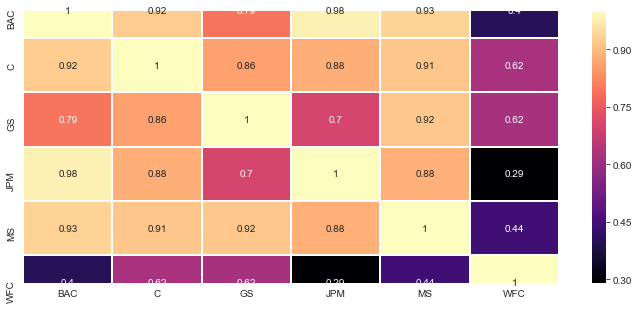

In [123]:
corr_data = bank_stocks.xs(key="Close", axis=1, level=1).corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr_data,cmap='magma',linecolor='white',linewidths=1, annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.